In [1]:
## 경고 메세지 표시 안하기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("Data/공공보건의료기관현황.csv", index_col = 0, encoding = 'CP949', engine = 'python')

In [4]:
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [5]:
addr = pd.DataFrame(data['주소'].apply ( lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))


In [6]:
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [7]:
# 문자열을 split으로 분리후 (공백기준) 처음두 단어 선택
# def abc(v):
#     return v.split()[:2]
# addr = pd.DataFrame(data['주소'].apply(abc).tolist(), columns = ('시도', '군구' )

In [8]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [9]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [10]:
addr.iloc[27] = ['경상남도','창원시']
addr.iloc[31] = ['경상남도','창원시']

In [11]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [12]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경산시', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '천안시', '충청북도'], dtype=object)

In [13]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [14]:
addr.iloc[47] = ['경상북도','경산시']

In [15]:
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [16]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [17]:
addr.iloc[209] = ['충청남도','천안시']
addr.iloc[210] = ['충청남도','천안시']

In [18]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [55]:
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도',
                '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시',
                '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도',
                '전북':'전라북도'}

In [56]:
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v,v))

In [53]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [20]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [21]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [22]:
addr.iloc[75] = ['제주특별자치도','제주시']

In [23]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [24]:
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [25]:
# addr['시도군구'] = addr.apply(lambda r: r['시도'] +" "+ r['군구'], axis = 1)

addr['시도군구'] = addr['시도'] +" "+ addr['군구']

In [26]:
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [27]:
addr['count'] = 0

In [28]:
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [29]:
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], as_index=False).count())

In [30]:
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [31]:
addr_group

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
...,...,...,...,...
151,충청북도,단양군,충청북도 단양군,1
152,충청북도,영동군,충청북도 영동군,1
153,충청북도,제천시,충청북도 제천시,1
154,충청북도,청주시,충청북도 청주시,3


In [32]:
population = pd.read_excel("Data/행정구역_시군구_별__성별_인구수_2.xlsx")

In [33]:
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [34]:
population = population.rename(columns = {'행정구역(시군구)별(1)':'시도', '행정구역(시군구)별(2)':'군구'})

In [35]:
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [36]:
# 시도군구 데이터 랖 또는 뒤의 Space 제거 (.strip() 앞뒤 스페이스 제거 )

for element in range(0, len(population)):
    population['군구'][element] = population['군구'][element].strip()

In [37]:
population['시도군구'] = population['시도'] +" "+ population['군구']

In [38]:
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구


In [39]:
population = population [ population.군구 != '소계' ]

In [40]:
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
5,서울특별시,성동구,300410,147020,153390,서울특별시 성동구
6,서울특별시,광진구,351263,170164,181099,서울특별시 광진구


In [41]:
# population = population.drop(population[population.군구 == '소계'].index)
# 두개의 Data 병합 (시도군구를 index로 해서)

population = population.set_index('시도군구')
addr_group = addr_group.set_index('시도군구')

In [42]:
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099


In [43]:
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [44]:
# 건수 적은 Data 기준으로 Merge (중복의 가능성)

addr_population_merge = pd.merge(addr_group, population, how = 'inner', left_index = True, right_index = True)

In [45]:
addr_population_merge

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,29664,15023,14641
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,48523,24060,24463
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,134359,67326,67033


In [46]:
# addr_population_join = addr_group.join(population, how = 'inner')

In [47]:
local_MC_population = addr_population_merge [['시도_x', '군구_x', 'count', '총인구수 (명)']]

In [48]:
local_MC_population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [49]:
local_MC_population = local_MC_population.rename(columns = {'시도_x': '시도', '군구_x': '군구','총인구수 (명)': '인구수' })

In [50]:
local_MC_population.head()

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [51]:
# 인구당 의료기관수 (비율), 가시성확보를 위해서 십만배

local_MC_population['MC_ratio'] = local_MC_population['count'].div(local_MC_population['인구수'],axis=0)*100000

In [78]:
local_MC_population.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


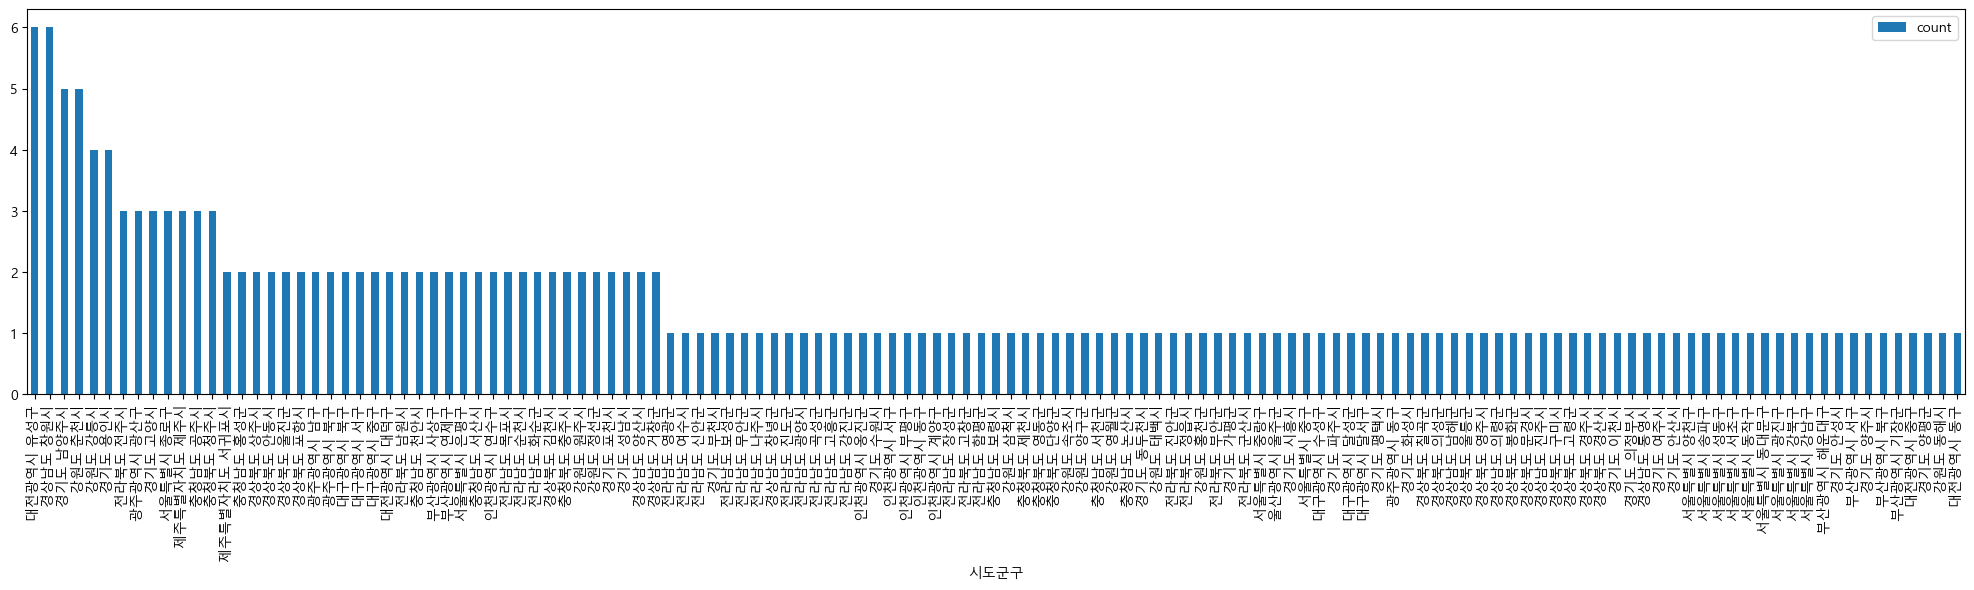

In [61]:
MC_ratio = local_MC_population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False )
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind = 'bar', rot = 90 ) # rot (rotation) : x축 범례 회전각도
plt.show()

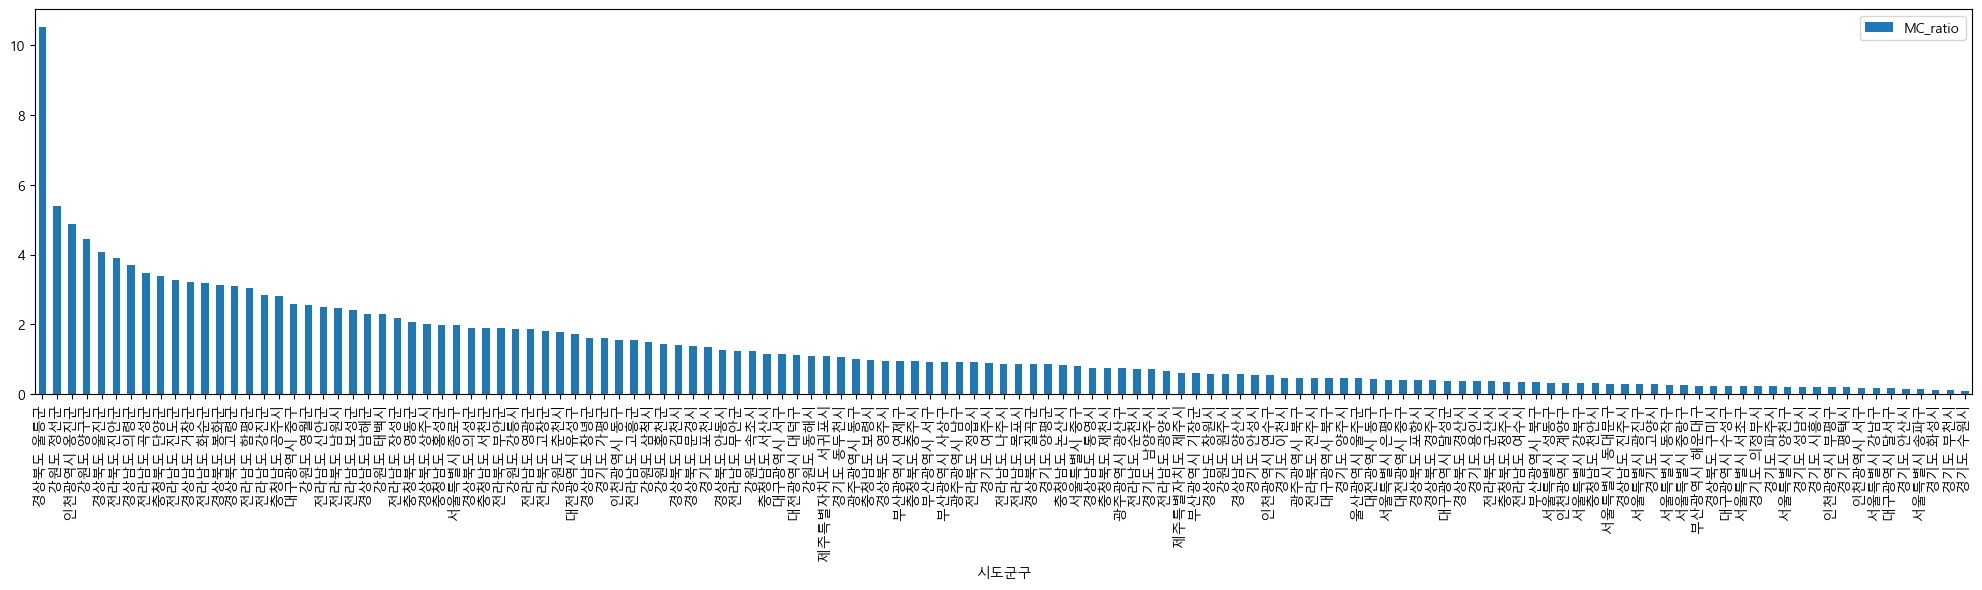

In [62]:
MC_ratio = local_MC_population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False )
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind = 'bar', rot = 90 ) # rot (rotation) : x축 범례 회전각도
plt.show()

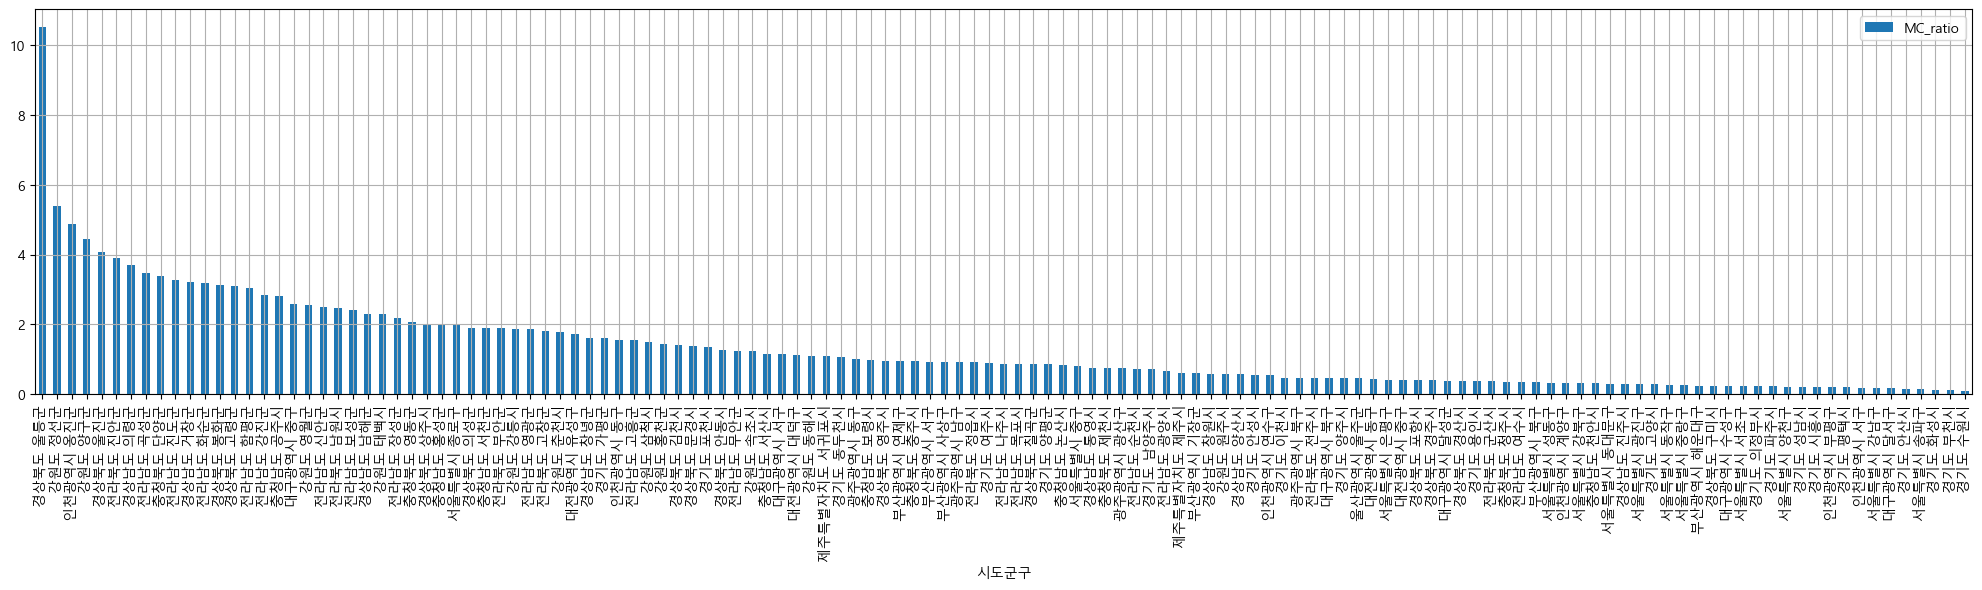

In [64]:
MC_ratio = local_MC_population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False )
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind = 'bar', rot = 90, grid = True ) # rot (rotation) : x축 범례 회전각도
plt.show()

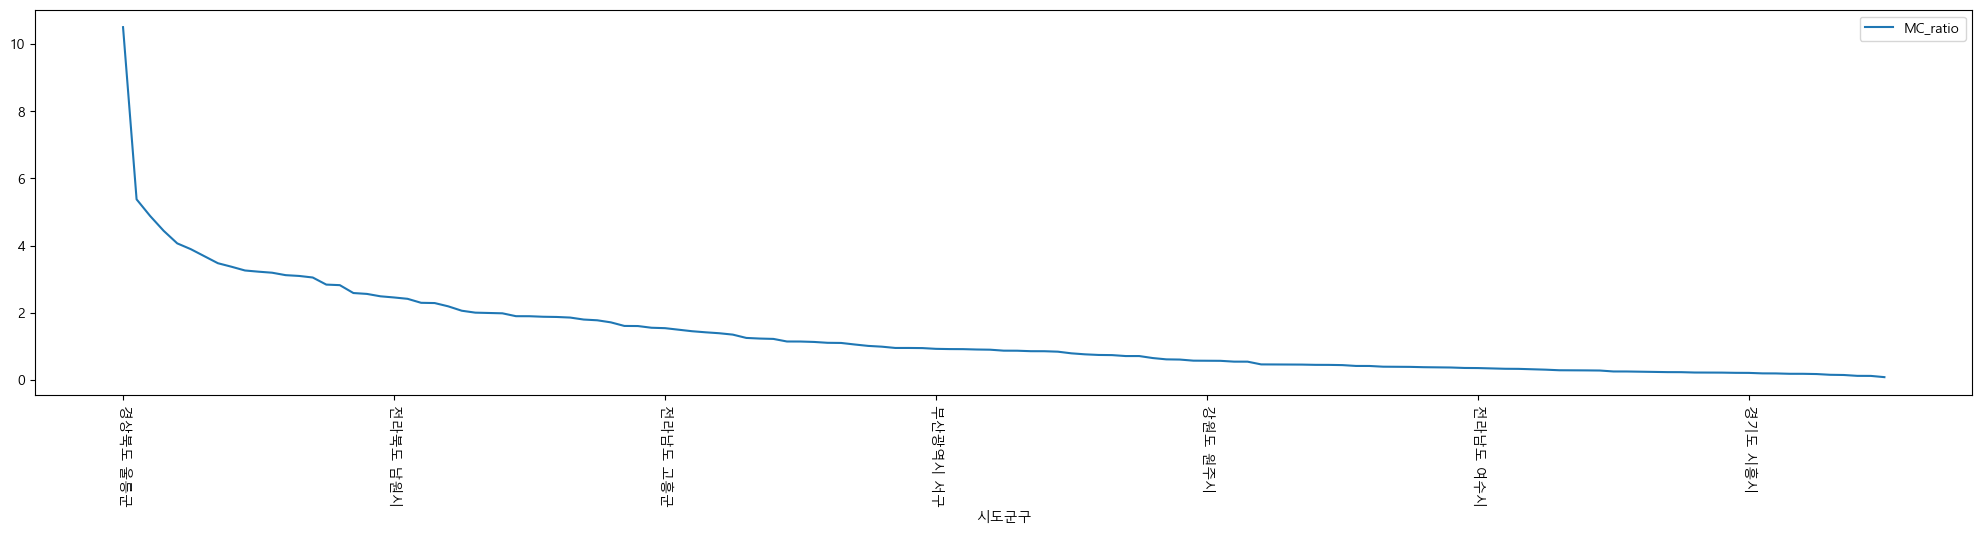

In [63]:
MC_ratio = local_MC_population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False )
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind = 'line', rot = -90 ) # rot (rotation) : x축 범례 회전각도
plt.show()

### Block Map 시각화

In [66]:
data_draw_korea = pd.read_csv('Data/data_draw_korea-002.csv', index_col = 0, encoding = 'UTF-8', engine = 'python')

In [67]:
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [68]:
data_draw_korea['시도군구'] = data_draw_korea['광역시도'] + ' ' + data_draw_korea['행정구역']

In [69]:
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [71]:
data_draw_korea = data_draw_korea.set_index('시도군구')

In [72]:
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [74]:
data_draw_korea.shortName.unique()

array(['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제',
       '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양', '과천',
       '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '성남', '수원', '시흥',
       '안산', '안성', '안양', '양주', '양평', '여주', '연천', '오산', '용인', '의왕', '의정부',
       '이천', '파주', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해',
       '남해', '밀양', '사천', '산청', '양산', '의령', '진주', '창녕', '창원', '통영', '하동',
       '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '문경', '봉화',
       '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성',
       '청도', '청송', '칠곡', '포항', '광주광산', '광주남구', '광주동구', '광주북구', '광주서구',
       '대구남구', '대구달서', '대구달성', '대구동구', '대구북구', '대구서구', '대구수성', '대구중구',
       '대전대덕', '대전동구', '대전서구', '대전유성', '대전중구', '부산강서', '부산금정', '부산기장',
       '부산남구', '부산동구', '부산동래', '부산부산진', '부산북구', '부산사상', '부산사하', '부산서구',
       '부산수영', '부산연제', '부산영도', '부산중구', '부산해운대', '서울강남', '서울강동', '서울강북',
       '서울강서', '서울관악', '서울광진', '서울구로', '서울금천', '서울노원', '서울도봉

In [75]:
data_draw_korea_MC_population_all = pd.merge(data_draw_korea, local_MC_population, how = 'outer', left_index = True, right_index = True)

In [76]:
data_draw_korea_MC_population_all

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,134359.0,0.744275
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


### 한국지도의 블록맵 경게선 (도/광역시 구분) 좌표를 리스트로 생성

In [77]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [81]:
def draw_blockMap(blockedMap, targetData, title, color ):
    
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)   
    ## np.isnan 함수를 사용하여 mapdata에서 NaN 값을 찾아, 마스크처리

    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)
    ## → 마스킹된 NaN값은 색상이 없고, 컬러맵의 가장 낮은 값과 가장 높은 값 설정

   
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        ## → targetData의 값이 whitelabelmin보다 크면 annocolor를 'white'로, 그렇지 않으면 'black'으로 

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        # 서울newline중구 식으로, 세종시 는 광역시도 제외 (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]


        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing) 


    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)  ## path에 있는 각 좌표를 ys와 xs에 분리하여 저장
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()  ## y축의 방향을 뒤집기 (아래쪽으로 +값)
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('blockMap_' + targetData + '.png')
                      
    
    plt.show() 
    
    

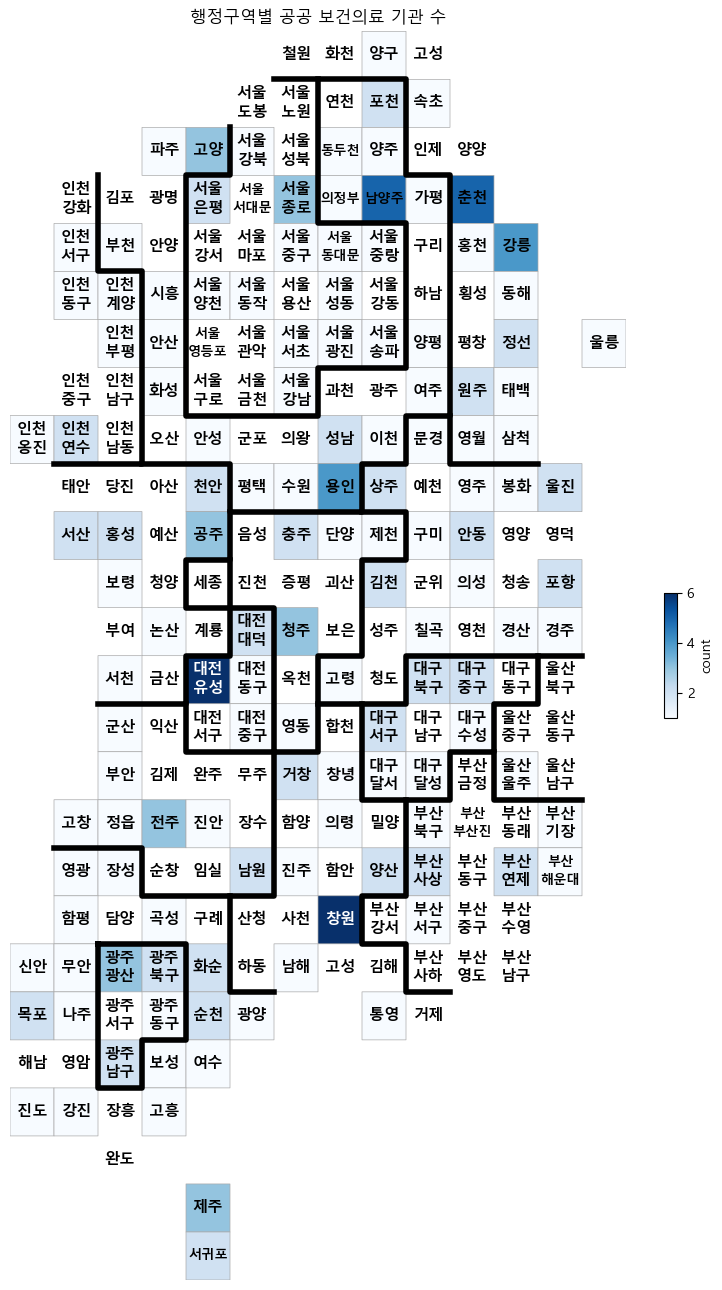

In [82]:
draw_blockMap(data_draw_korea_MC_population_all, 'count', '행정구역별 공공 보건의료 기관 수', 'Blues')

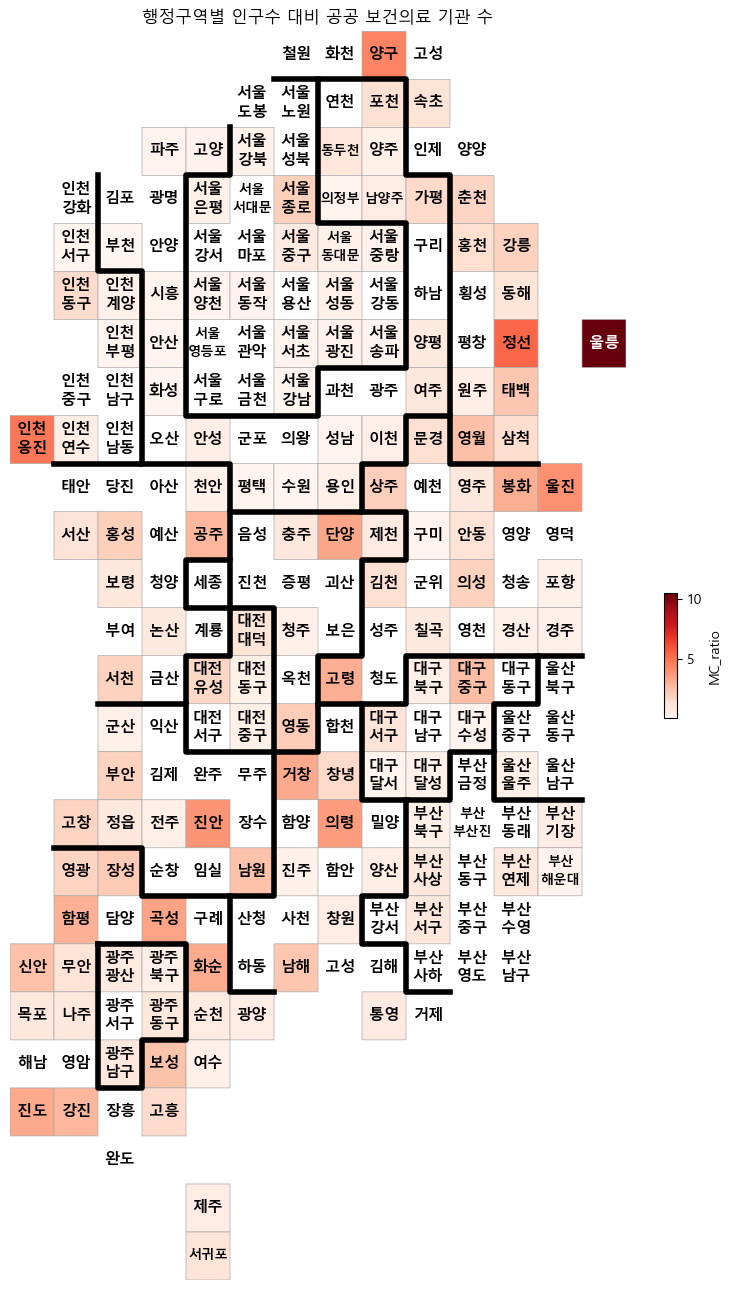

In [83]:
draw_blockMap(data_draw_korea_MC_population_all, 'MC_ratio', '행정구역별 인구수 대비 공공 보건의료 기관 수', 'Reds')